# Calibration of the Heston Stochastic Volatility Model

#### - Aakash Agarwal


#### Packages Used

In [1]:
import numpy as np
from heston import Heston_EuCall
from scipy.optimize import minimize
import matplotlib.pyplot as plt

#### Load data from file and skip header row (column names)  

In [2]:
data = np.genfromtxt('./option_prices_sp500.csv', delimiter=',', skip_header=1)
it = 1 # Index of the row to use for calibration (1-based) 

#### Callback function for the optimization routine

In [3]:
def callback(params):  
    """ Simple callback function to be submitted to the scipy.optimize.minimize routine """
    global it
    if it == 1:
        print('Starting optimization...')
    print('It: {:4d},  '.format(it) + ''.join([name + ' = {:.4e}, '.format(param) for name, param in zip(['gamma_0', 'kappa', 'lambda', 'sigma_tilde'], params)]) + 'MSE = {:.4f}'.format(min_func(params)))
    it += 1

#### Objective function to be minimized (Mean Squared Error)

In [4]:
def min_func(params): 
    """ Objective function to be minimized """
    S0 = data[0, 2]  # S&P500 level from the data set
    r = data[0, 3]  # Interest rate from the data set
    gam0, kappa, lamb, sig_tild = params
    strikes = data[:, 0]  # Strikes from the data set
    options_data = data[:, 1]  # Option prices from the data set
    options_model = Heston_EuCall(S0, r, gam0, kappa, lamb, sig_tild, T=1, K=strikes, R=1.5, N=2 ** 15)
    return np.square(options_model - options_data).mean()

#### Optimization of Heston Model Parameters

In [5]:
# Initial parameters and bounds for the optimization routine 
initial_params = np.array([0.3 ** 2, 0.3 ** 2, 2.5, 0.2])
bounds = [[1e-8, 2], [1e-8, 2], [1e-8, 10], [1e-8, 1]]

# Run the optimization routine 
res = minimize(min_func, initial_params, bounds=bounds, callback=callback, method='L-BFGS-B')
gam0, kappa, lamb, sig_tild = res.x

# Print the final estimate of the parameters
print('Final estimate: gamma_0 = {:.4e}, kappa = {:.4e}, lambda = {:.4e}, sigma_tilde = {:.4e}'.format(gam0, kappa, lamb, sig_tild))


Starting optimization...
It:    1,  gamma_0 = 7.4671e-02, kappa = 7.4671e-02, lambda = 3.7775e+00, sigma_tilde = 3.3626e-01, MSE = 1432.0563
It:    2,  gamma_0 = 8.1660e-02, kappa = 8.1828e-02, lambda = 3.4051e+00, sigma_tilde = 2.9644e-01, MSE = 883.5418
It:    3,  gamma_0 = 8.4941e-02, kappa = 8.5239e-02, lambda = 3.1683e+00, sigma_tilde = 2.7110e-01, MSE = 828.2183
It:    4,  gamma_0 = 8.4133e-02, kappa = 8.4425e-02, lambda = 3.2292e+00, sigma_tilde = 2.7758e-01, MSE = 822.3429
It:    5,  gamma_0 = 8.4170e-02, kappa = 8.4486e-02, lambda = 3.2235e+00, sigma_tilde = 2.7693e-01, MSE = 822.2902
It:    6,  gamma_0 = 8.4142e-02, kappa = 8.4486e-02, lambda = 3.2220e+00, sigma_tilde = 2.7672e-01, MSE = 822.2839
It:    7,  gamma_0 = 8.3628e-02, kappa = 8.4429e-02, lambda = 3.2009e+00, sigma_tilde = 2.7375e-01, MSE = 822.2054
It:    8,  gamma_0 = 8.2432e-02, kappa = 8.4251e-02, lambda = 3.1578e+00, sigma_tilde = 2.6755e-01, MSE = 822.0577
It:    9,  gamma_0 = 7.8247e-02, kappa = 8.3558e-02, l

#### Visualization of Fitted Model Prices vs. Market Data

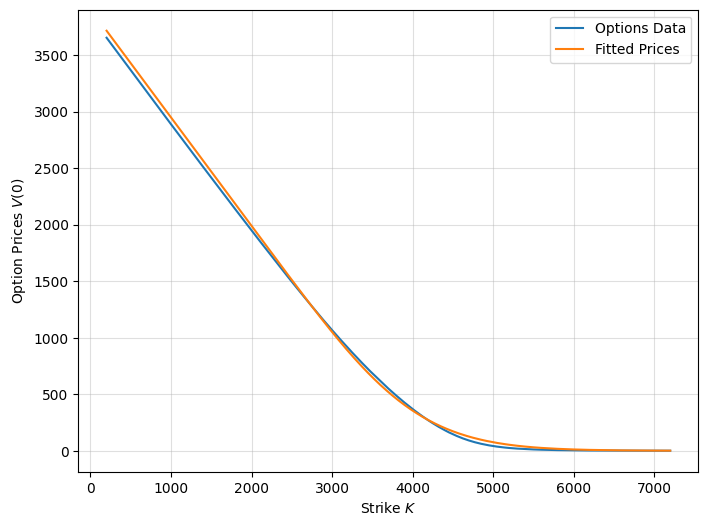

In [6]:
# Compute the model prices using the fitted parameters
fitted_model_prices = Heston_EuCall(S0=data[0, 2], r=data[0, 3], gam0=gam0, kappa=kappa, lamb=lamb, sig_tild=sig_tild, T=1, K=data[:, 0], R=1.5, N=2 ** 15)

# Plot the data and the fitted prices
plt.figure(figsize=(8, 6))
plt.plot(data[:, 0], data[:, 1])
plt.plot(data[:, 0], fitted_model_prices)
plt.xlabel('Strike $K$')
plt.ylabel('Option Prices $V(0)$')
plt.legend(['Options Data', 'Fitted Prices'])
plt.grid(alpha=0.4)
plt.show()